In [1]:
import json
import multiprocessing
import hashing.lsh_main as lsh
# import graph.graph_main as graph
import time
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import graph.random_walk_ori as random_walk
import pandas as pd
import lshashpy3 as lshash


In [2]:
data = pd.read_csv('Graph1.csv')
data = data['Graph1'].tolist()
data = data[:30000]
len(data)

# #define moving average function
# def moving_avg(x, n):
#     cumsum = np.cumsum(np.insert(x, 0, 0)) 
#     return (cumsum[n:] - cumsum[:-n]) / float(n)

# #calculate moving average using previous 3 time periods

# data = moving_avg(data, 200).tolist()


30000

In [3]:
# df_ori = data[:15000]
noise = np.random.normal(0,.015,len(data))
generated = list(data + noise)

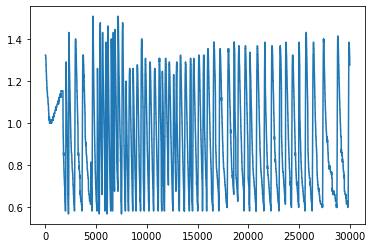

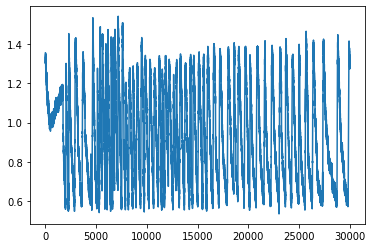

In [4]:
plt.plot(data)
plt.show()
plt.plot(generated)
plt.show()

In [5]:
window = 3072
segments = []
segments = [generated[i:i + window] for i in range(0, len(generated) - window, int(0.1 * window))]


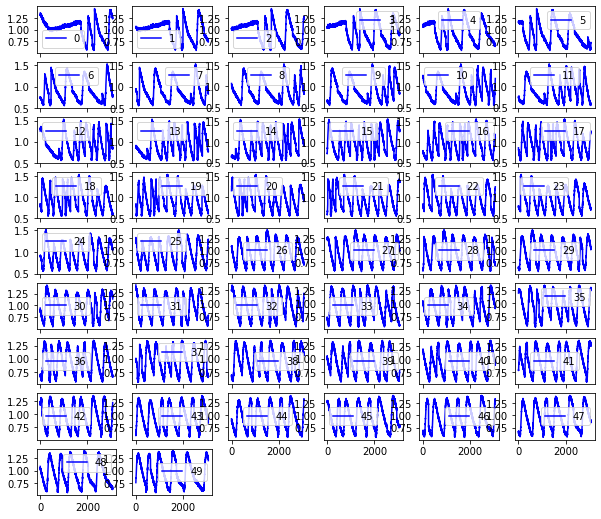

In [6]:
df_segments = pd.DataFrame(segments)
df_segments = df_segments.T

df_segments.iloc[: , :50].plot(subplots=True, layout=(10,6), figsize=(10, 10), legend = True, color = 'b')
plt.show()

In [7]:
lsh = lshash.LSHash(8, len(segments[0]), num_hashtables=8)

for i in segments:
    lsh.index(i)

# results = [list(lsh.query(i)[0][0][0]) for i in segments]

# results = pd.DataFrame(results)
# results = results.T

# results.plot(subplots=True, layout=(5,5), figsize=(10, 5), legend = False, color = 'b')
# plt.show()


In [8]:
to_query = [data[i:i + window] for i in range(0, len(data) - window, window)]


In [9]:
results = [lsh.query(to_query[i])[0][0][0] for i in range(len(to_query))]

In [10]:
res_lsh = []
for l in results: 
    res_lsh += l

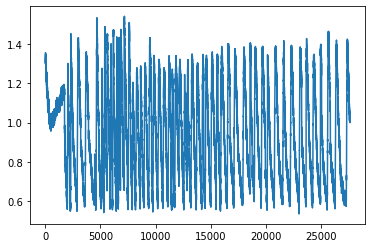

In [11]:
plt.plot(res_lsh)
plt.show()

In [12]:
#Calculates the distance between two series. Given series A, B returns the Euclidean distance between A and B
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2))
    
#The probability is converted according to the sorted distances, which adds up to 1
def distopro(a):
    a=len(a)
    if(a==3):
        b=[0.2,0.3,0.5]
    elif(a==4):
        b=[0.1,0.2,0.3,0.4]
    else:
        b=[0.04,0.12,0.2,0.28,0.36]
    return np.array(b)
        

#Input is the original data matrix, return is the relationship matrix relation_matrix, and probability matrix probability_matrix
#Data is the matrix of series, the first dimension is the number of series, and the second dimension is each series
#Window_size is the size of the window to calculate the distance, and k is the number of the nearest neighbors selected. Currently, 3,4,5 are supported
def transform(data, window_size, k):
    numOfSeq=data.shape[0]
    distance_matrix=np.ones([numOfSeq,numOfSeq],dtype = float)
    for i in range(numOfSeq):
        for j in range(numOfSeq):
            distance_matrix[i][j]=distance(data[i,data.shape[1]-window_size:],data[j,0:window_size])
    relation_matrix=np.ones([numOfSeq,k],dtype = int)
    subdistance_matrix=np.ones([numOfSeq,k],dtype = float)
    probability_matrix=np.ones([numOfSeq,k],dtype = float)
    for i in range(numOfSeq):
        relation_matrix[i]=distance_matrix[i].argsort()[::-1][data.shape[0]-k:]
        #print(relation_matrix[i])
#     print(relation_matrix[i])
    for i in range(numOfSeq):
        for j in range(k):
            subdistance_matrix[i][j]=distance_matrix[i][relation_matrix[i][j]]
    
    for i in range(numOfSeq):
        probability_matrix[i]=distopro(subdistance_matrix[i])
    
    
    return distance_matrix, subdistance_matrix ,relation_matrix, probability_matrix
            
      
#print(transform(np.array([[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]), 2, 3))


#Given the ID of the current series, the ID of the next series is generated randomly according to probability
def next_step(relation_array, probability_array):
    value=random.random()
#     print(value)
    threshold=[0]
    sum_value=0
    for i in range(len(probability_array)):
        sum_value=sum_value+probability_array[i]
        threshold.append(sum_value)
    for i in range(len(threshold)-1):
        if(value>threshold[i] and value<=threshold[i+1]):
            return relation_array[i]

#Given a relation matrix and a probability matrix, returns a series of length        
def random_walk(relation_matrix, probability_matrix, length):
    #seq=[0]
    temp_id=0
    for i in range(length-1):
        temp_id=next_step(relation_matrix[temp_id],probability_matrix[temp_id])
        seq.append(temp_id)
        #print(temp_id)
    return np.array(seq)

In [13]:
seq=[0]

a,b,c,d=transform(np.array(segments), 100, 5)


path = random_walk( c, d, int(len(data)/window))
print(seq)

[0, 86, 74, 68, 1, 82, 55, 8, 48]


In [14]:
res_graph=[]
for i in (range(len(path))):
    print(seq[i])
    res_graph+=segments[seq[i]]
    
# res_lsh = pd.read_csv('example_data.csv')
# res_lsh = res_lsh['LSH'].tolist()

# res_graph = pd.read_csv('example_data.csv')
# res_graph = res_graph['Graph'].tolist()

0
86
74
68
1
82
55
8
48


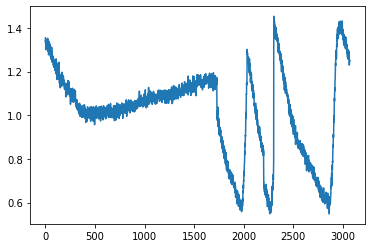

In [15]:
plt.plot(segments[0])
plt.show()

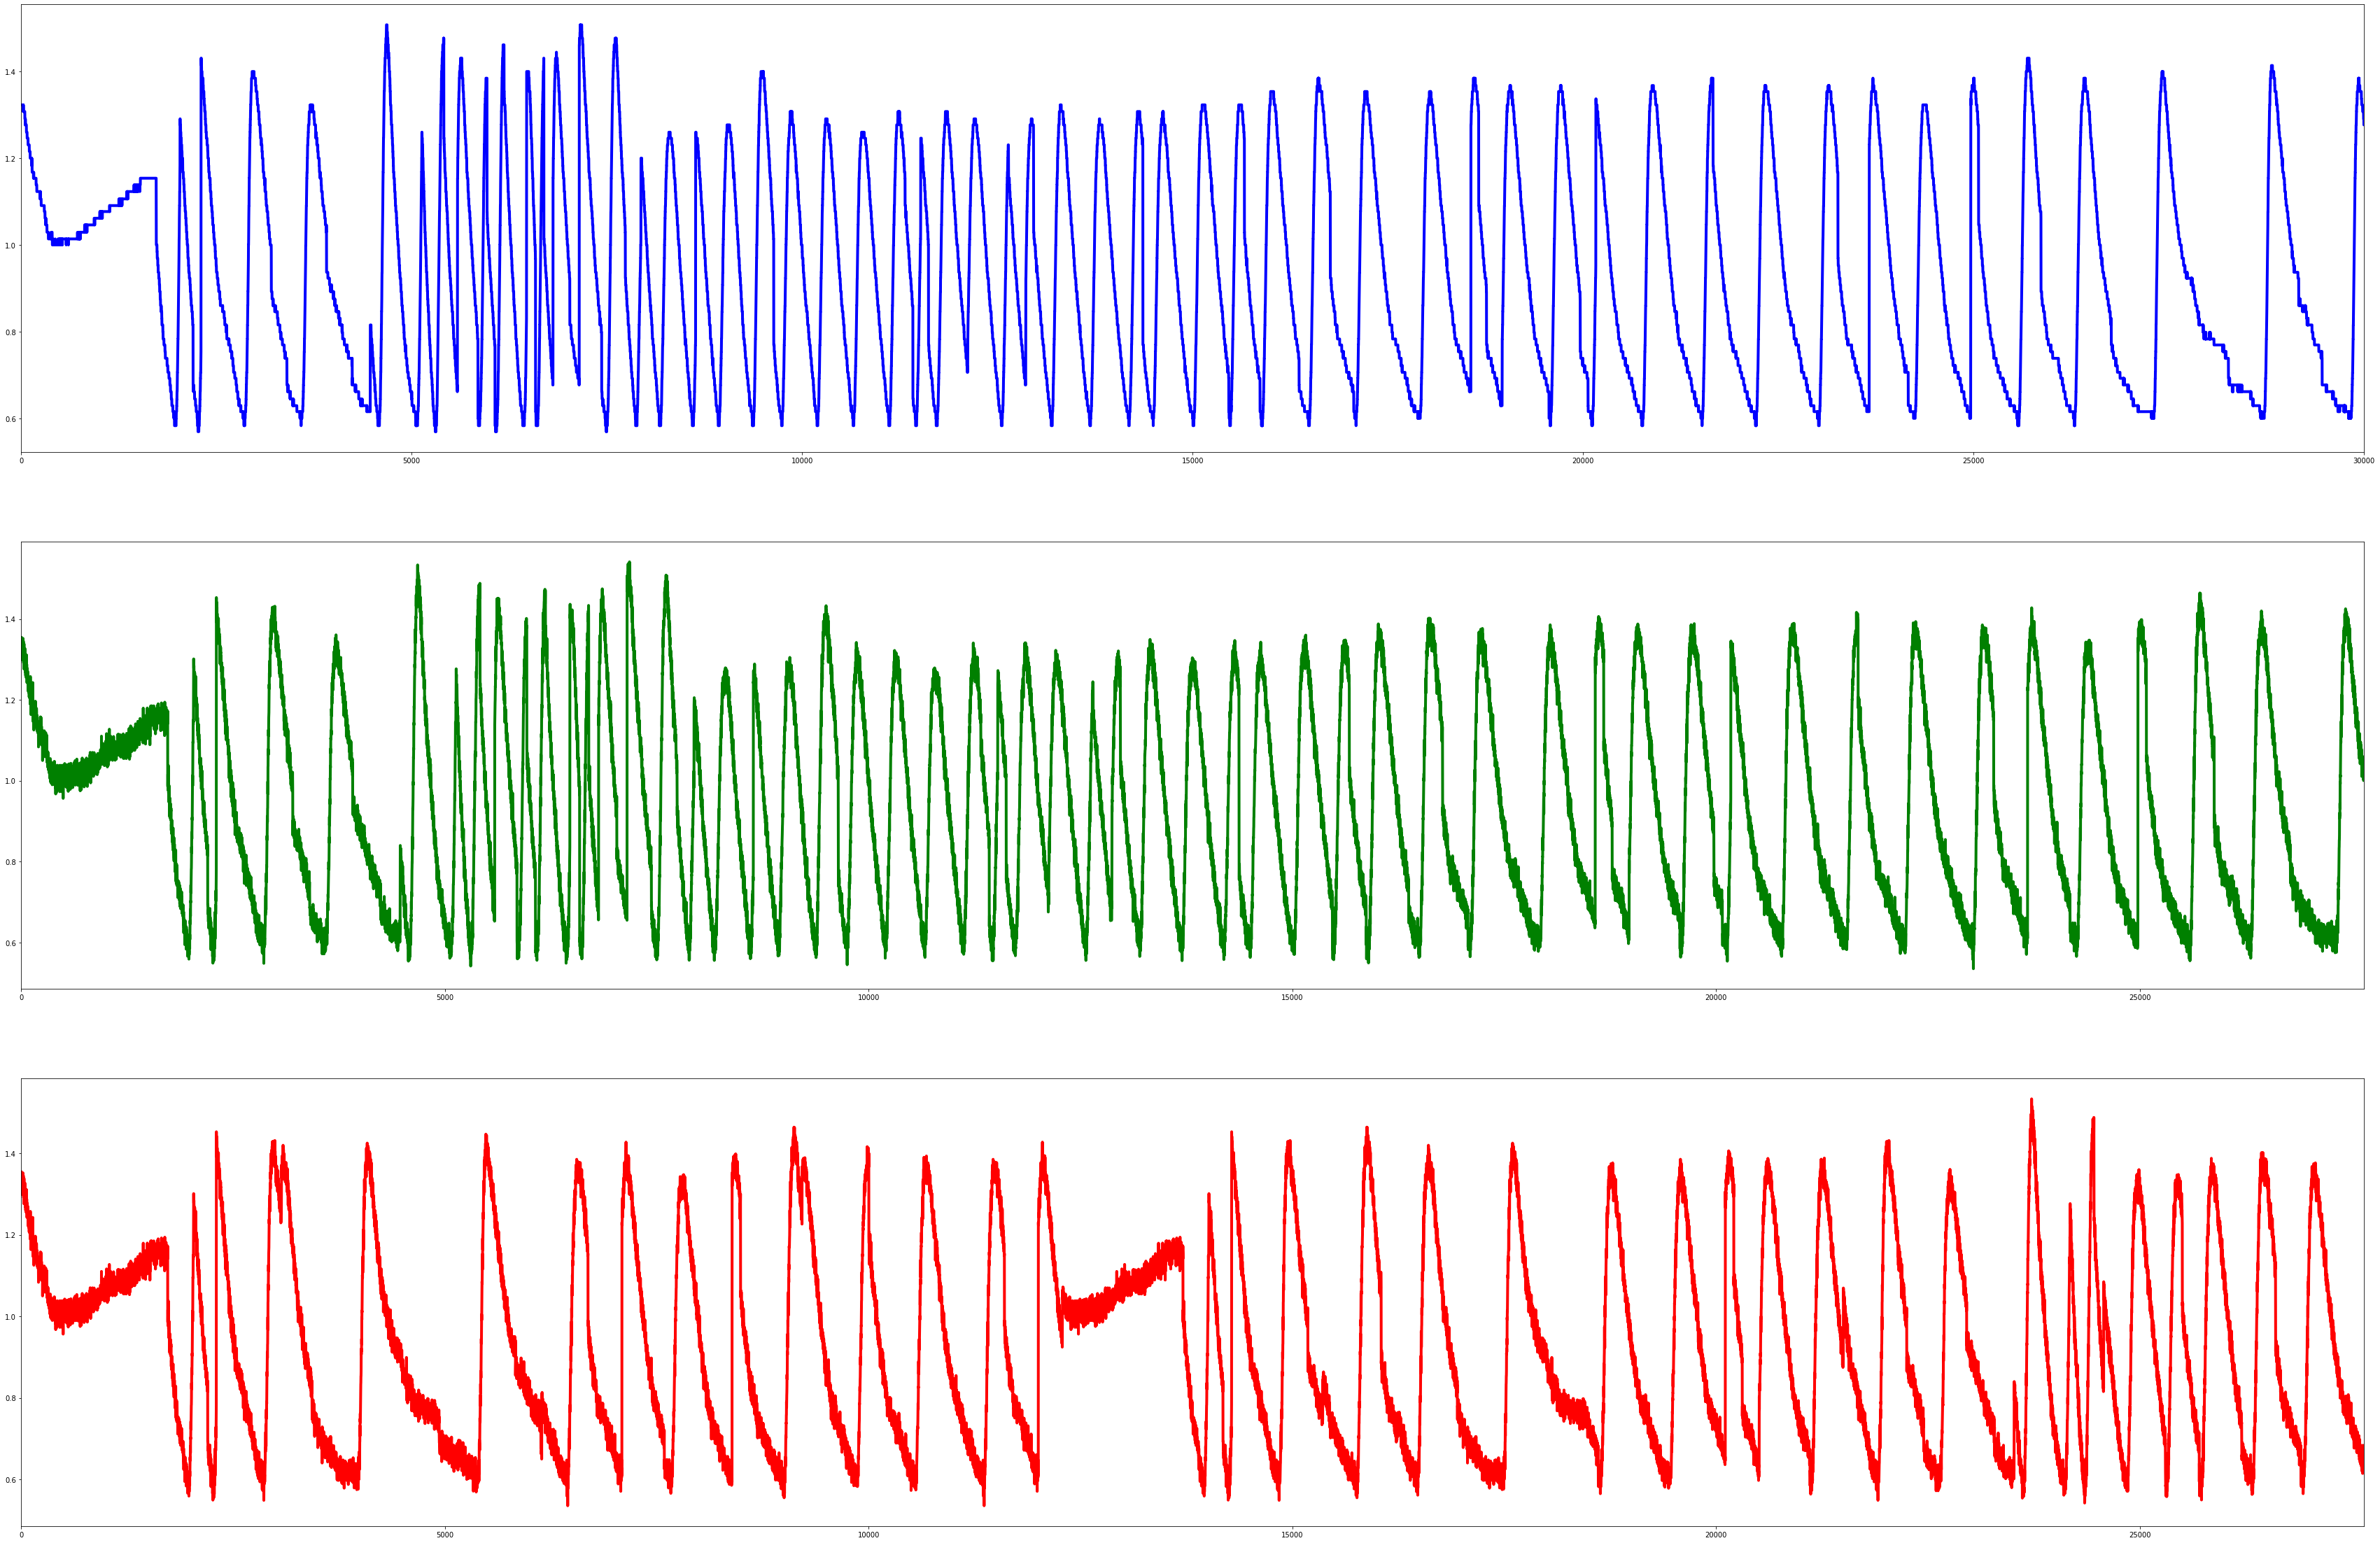

In [16]:
xi = list(range(10000))
# plot the index for the x-values 

plt.figure(figsize=(60, 40))
plt.subplot(3, 1, 1)

# plt.figure(figsize=(60, 8))
plt.plot(data,color='blue',linewidth=4.0, label='Original')
plt.xlim(0,len(data))
# plt.ylim(8.1,8.7)
# plt.legend(loc="upper left", prop={'size': 36})

# plt.show()

plt.subplot(3, 1, 2)

# plt.figure(figsize=(60, 8))
plt.plot(res_lsh,color='green',linewidth=4.0, label='LSH')
plt.xlim(0,len(res_lsh))
# plt.ylim(8.1,8.7)
# plt.legend(loc="upper left", prop={'size': 36})

# plt.show()

plt.subplot(3, 1, 3)

# plt.figure(figsize=(60, 8))
plt.plot(res_graph,color='red',linewidth=4.0, label='Graph')
plt.xlim(0,len(res_graph))
# plt.ylim(8.1,8.7)

# plt.legend(loc="upper left", prop={'size': 36})
# plt.show()
plt.savefig('plot_lsh_graph.pdf',dpi=1600,
            bbox_inches = 'tight')



# Metrics

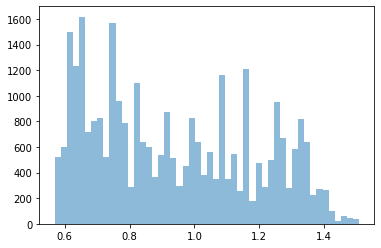

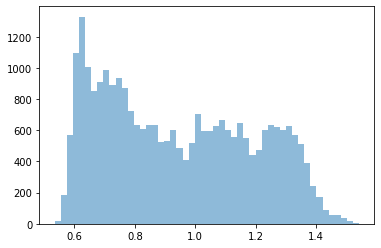

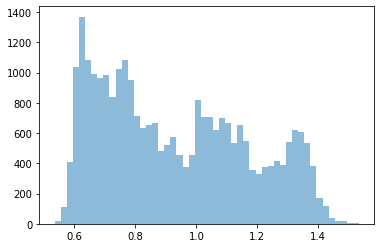

In [17]:
plt.hist(data, bins=50, alpha=0.5)
plt.show()
plt.hist(res_lsh, bins=50, alpha=0.5)
plt.show()
plt.hist(res_graph, bins=50, alpha=0.5)
plt.show()


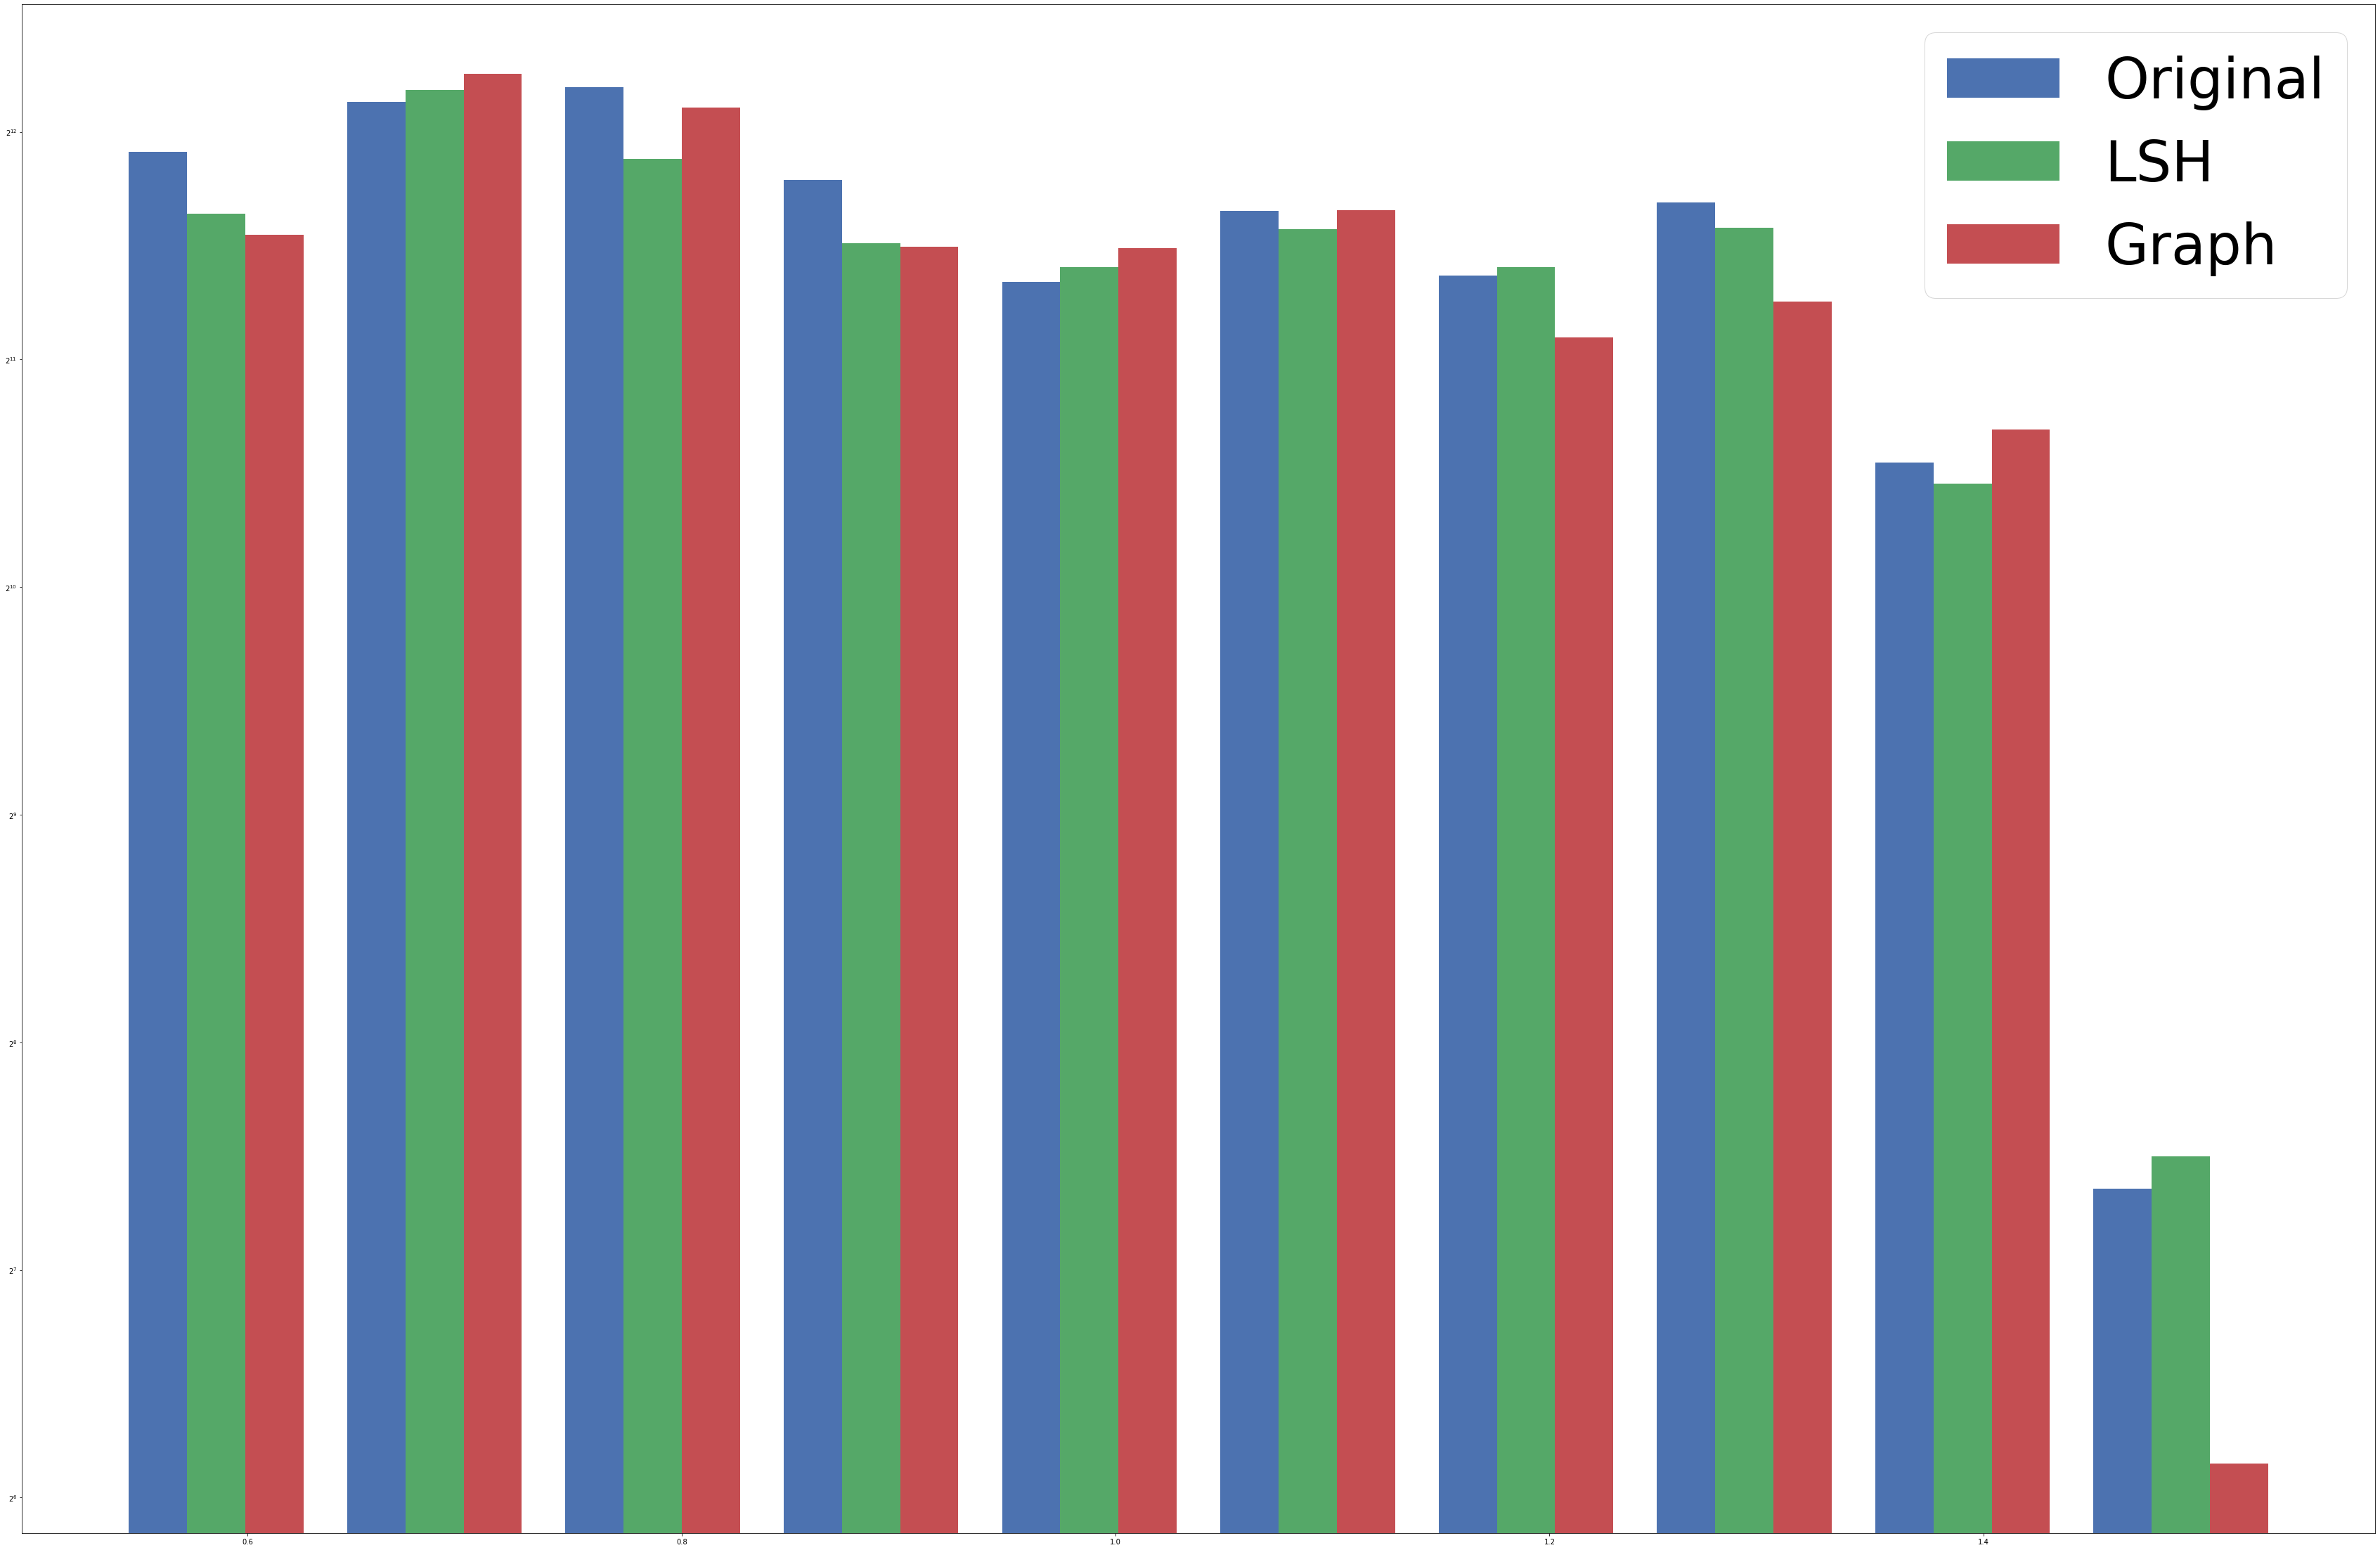

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))

plt.style.use('seaborn-deep')

plt.yscale('log',base=2) 
plt.hist([data, res_lsh, res_graph], bins=10, label=['Original', 'LSH', 'Graph'])

plt.legend(loc="upper right", prop={'size': 80})

plt.savefig('plot_distribution.pdf',dpi=1600,
            bbox_inches = 'tight')
# plt.show()